# 0. Download Dataset

In [ ]:
!pip install -q gdown

# Download processed dataset in Data_Processing file
!gdown 1E50Q-N0w1v2Lc8RC_GjjTDCiWbu71aZG

Downloading...
From (original): https://drive.google.com/uc?id=1E50Q-N0w1v2Lc8RC_GjjTDCiWbu71aZG
From (redirected): https://drive.google.com/uc?id=1E50Q-N0w1v2Lc8RC_GjjTDCiWbu71aZG&confirm=t&uuid=324f17d7-aa00-482e-bcc4-ad4b8a574c81
To: /content/datasets.zip
100% 4.69G/4.69G [01:05<00:00, 72.1MB/s]


In [ ]:
!unzip /content/datasets.zip -d /content/datasets

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/datasets/labels/val/DJI_0090-035_018915.txt  
  inflating: /content/datasets/labels/val/DJI_0090-035_018945.txt  
  inflating: /content/datasets/labels/val/DJI_0090-035_018975.txt  
  inflating: /content/datasets/labels/val/DJI_0090-035_019005.txt  
  inflating: /content/datasets/labels/val/DJI_0090-035_019035.txt  
  inflating: /content/datasets/labels/val/DJI_0090-035_019065.txt  
  inflating: /content/datasets/labels/val/DJI_0090-035_019095.txt  
  inflating: /content/datasets/labels/val/DJI_0090-035_019125.txt  
  inflating: /content/datasets/labels/val/DJI_0090-035_019155.txt  
  inflating: /content/datasets/labels/val/DJI_0090-035_019185.txt  
  inflating: /content/datasets/labels/val/DJI_0090-035_019215.txt  
  inflating: /content/datasets/labels/val/DJI_0090-035_019245.txt  
  inflating: /content/datasets/labels/val/DJI_0090-035_019275.txt  
  inflating: /content/datasets/labels/val/DJI_0090-035_0193

# 1. Import Libraries

In [ ]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.7 MB/s eta 0:00:00


# 2. Training

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# Config
epochs = 80
batch_size = -1
image_size = 640
mosaic = 0.5
hsv_h = 0.015
hsv_s = 0.7
hsv_v = 0.4
cos_lr = True
patience = 20
cache = True
yolo_yaml_path = '/content/datasets/data.yaml'

# Train the model
results = model.train(
    data=yolo_yaml_path,
    epochs=epochs,
    batch=batch_size,
    imgsz=image_size,
    mosaic=mosaic,
    hsv_h=hsv_h,
    hsv_s=hsv_s,
    hsv_v=hsv_v,
    cos_lr=cos_lr,
    patience=patience,
    cache=cache
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.206 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/datasets/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=Fals

In [ ]:
!zip -r -q /content/runs.zip /content/runs
from google.colab import files
files.download('/content/runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3. Evaluation

In [ ]:
from ultralytics import YOLO

# Load the trained model
model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLO(model_path)

# Evaluate the trained model
metrics = model.val(data='/content/datasets/data.yaml')

Ultralytics 8.3.206 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 376.4±230.7 MB/s, size: 966.9 KB)
val: Scanning /content/datasets/labels/val.cache... 852 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 852/852 344.3Kit/s 0.0s
val: /content/datasets/images/val/DJI_0075_003400.jpg: 1 duplicate labels removed
val: /content/datasets/images/val/DJI_0075_003490.jpg: 1 duplicate labels removed
val: /content/datasets/images/val/DJI_0075_003520.jpg: 1 duplicate labels removed
val: /content/datasets/images/val/DJI_0075_003550.jpg: 1 duplicate labels removed
val: /content/datasets/images/val/DJI_0075_003580.jpg: 1 duplicate labels removed
val: /content/datasets/images/val/DJI_0075_013220.jpg: 1 duplicate labels removed
val: /content/datasets/images/val/DJI_0075_013280.jpg: 1 duplicate labels removed
val: /content/datasets/images/val/DJI_0075_0133

# 4. Inference


image 1/1 /content/datasets/images/test/50m_90d_morning_congkhuA_22_3_000750.jpg: 384x640 14 motorbikes, 2 cars, 55.2ms
Speed: 3.5ms preprocess, 55.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/models/yolo/detect/inference


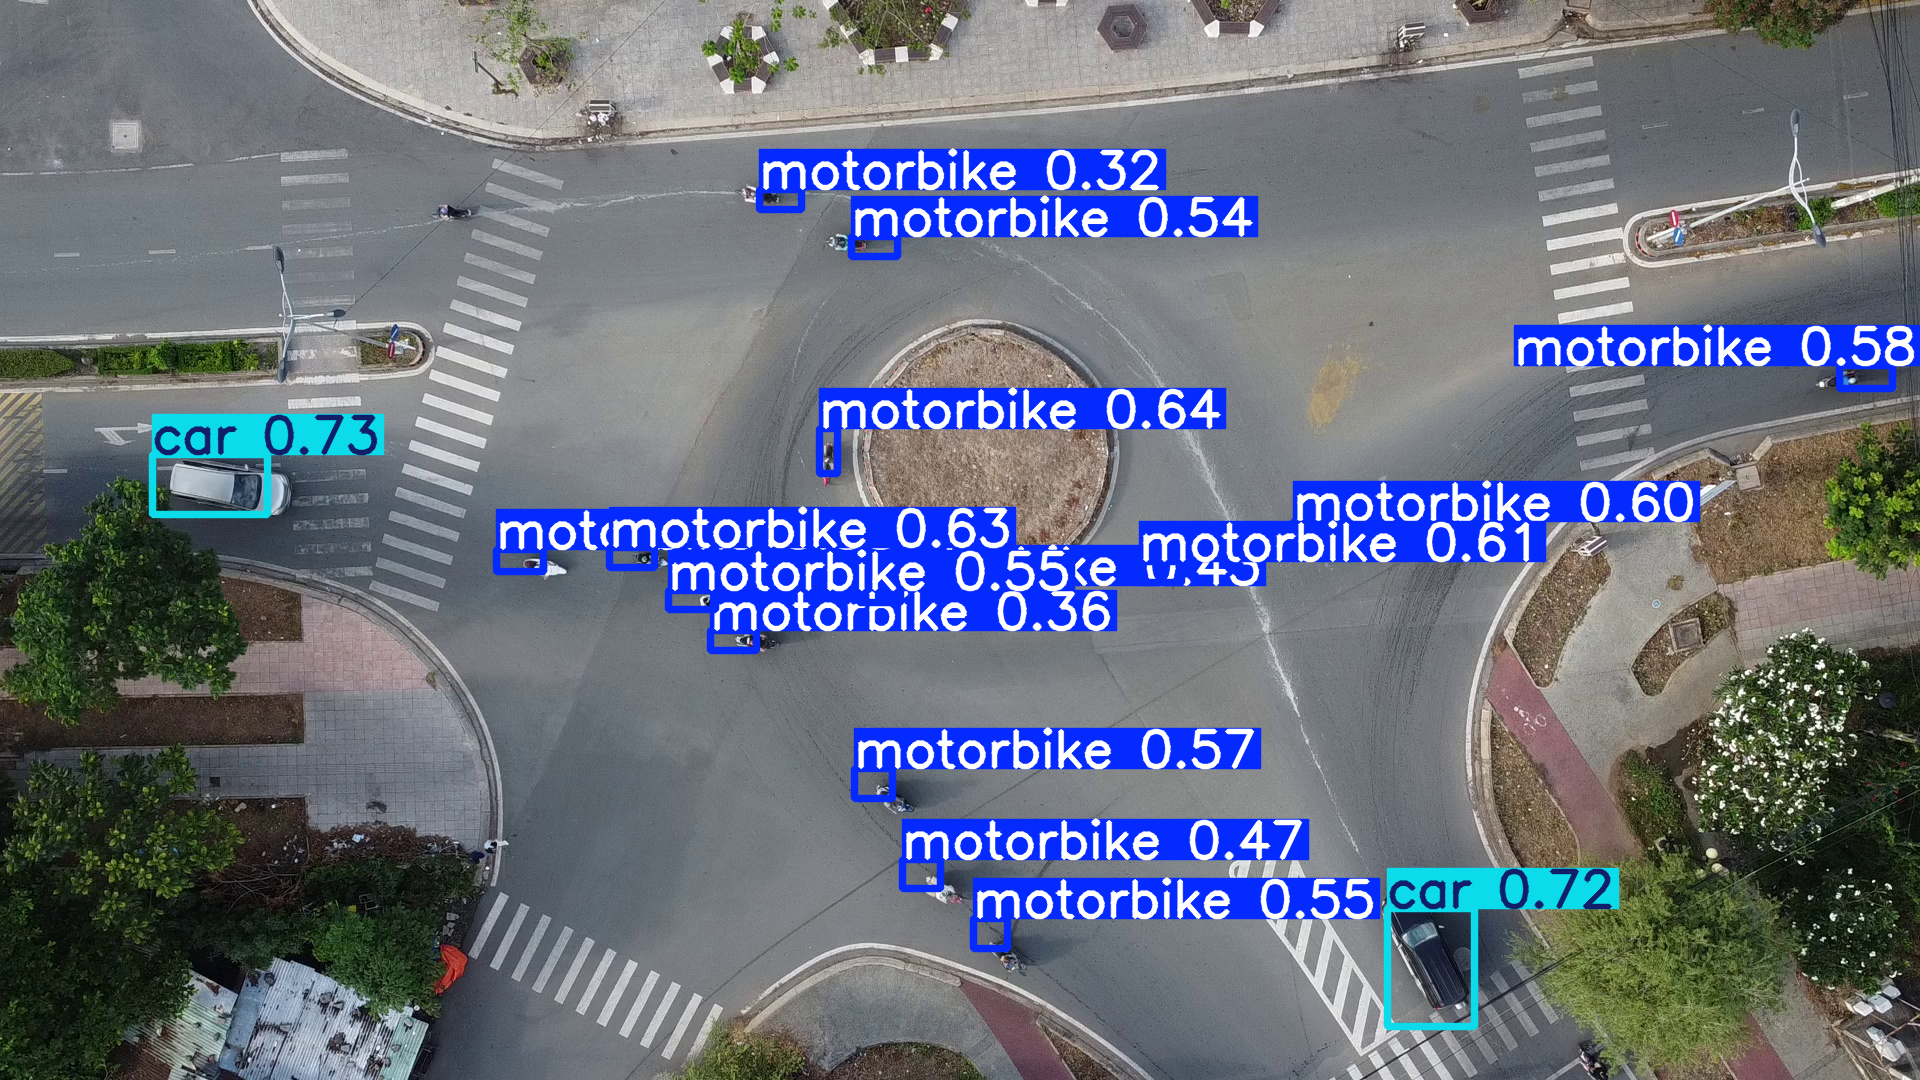

In [ ]:
test_img = "/content/datasets/images/test/50m_90d_morning_congkhuA_22_3_000750.jpg"

results = model.predict(
    source=test_img,
    conf=0.25,
    project="/content/models/yolo",
    name="detect/inference",
    save=True
)
results[0].show()